In [1]:
%matplotlib inline

from ctapipe.calib.camera.calibrators import calibration_parameters
from ctapipe.calib.camera.calibrators import calibrate_event
from ctapipe.utils.datasets import get_path
from ctapipe.io.files import InputFile
from ctapipe.io import CameraGeometry
from ctapipe.visualization import CameraDisplay
from matplotlib import pyplot as plt

In [2]:
origin = 'hessio'

In [3]:
filepath = get_path('gamma_test.simtel.gz')

In [4]:
file = InputFile(filepath, origin)

INFO: [file] /Users/Jason/Software/ctapipe/ctapipe-extra/datasets/gamma_test.simtel.gz [ctapipe.io.files]
INFO: [file][origin] hessio [ctapipe.io.files]


Print argparser for calibration parameters

In [5]:
calibration_parameters([], origin, True)

usage: __main__.py [-h] [--integrator {1,2,3,4,5}]
                   [--integration-window INTEGRATION_WINDOW INTEGRATION_WINDOW]
                   [--integration-sigamp INTEGRATION_SIGAMP [INTEGRATION_SIGAMP ...]]
                   [--integration-clip_amp INTEGRATION_CLIP_AMP]
                   [--integration-lwt INTEGRATION_LWT]
                   [--integration-calib_scale INTEGRATION_CALIB_SCALE]

optional arguments:
  -h, --help            show this help message and exit
  --integrator {1,2,3,4,5}
                        which integration scheme should be used to extract the
                        charge? - 1 = full_integration - 2 =
                        simple_integration - 3 = global_peak_integration - 4 =
                        local_peak_integration - 5 = nb_peak_integration
                        (default: 5)
  --integration-window INTEGRATION_WINDOW INTEGRATION_WINDOW
                        Set integration window width and offset (to before the
                   

SystemExit: 0

/Users/Jason/anaconda3/envs/cta/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
cmdline = ['--integrator','4']
params, unknown_args = calibration_parameters(cmdline, origin, False)

INFO: [integration_sigamp] [2, 4] [ctapipe.calib.camera.calibrators]
INFO: [integration_clip_amp] None [ctapipe.calib.camera.calibrators]
INFO: [integrator] local_peak_integration [ctapipe.calib.camera.calibrators]
INFO: [integration_window] [7, 3] [ctapipe.calib.camera.calibrators]
INFO: [integration_lwt] 0 [ctapipe.calib.camera.calibrators]
INFO: [integration_calib_scale] 0.92 [ctapipe.calib.camera.calibrators]


In [7]:
event = file.get_event(4)
tel_list = list(event.dl0.tels_with_data)
telid = tel_list[0]
geom = CameraGeometry.guess(*event.meta.pixel_pos[telid],
                                event.meta.optical_foclen[telid])
telid

INFO: [file][read] Finding event index 4... [ctapipe.io.files]


INFO: [file] Event 4 found [ctapipe.io.files]


2

In [8]:
calibrated_event = calibrate_event(event, params)

In [24]:
pe_charge = calibrated_event.dl1.tel[telid].pe_charge

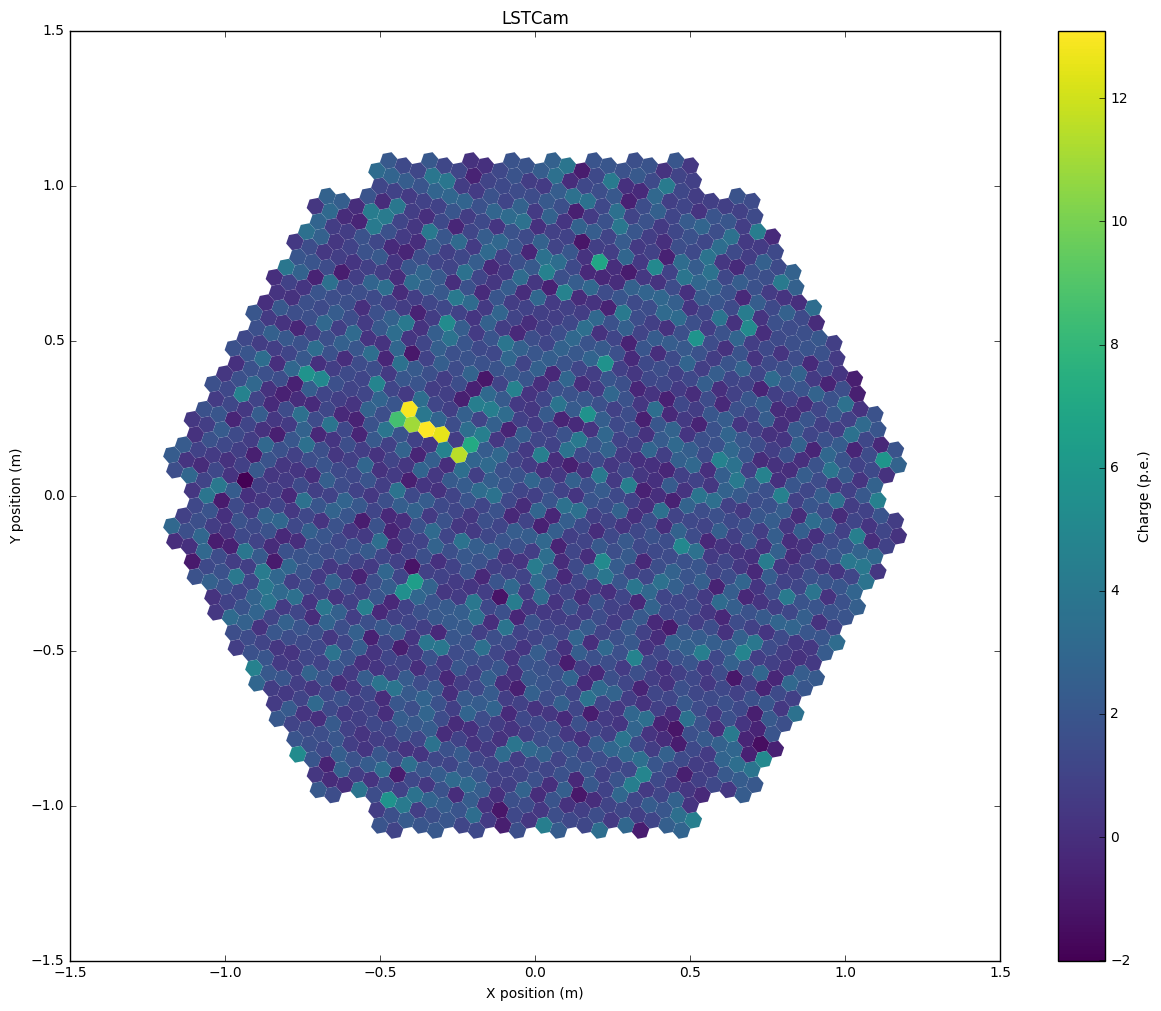

In [10]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1, 1, 1)

camera = CameraDisplay(geom, ax=ax)
camera.image = pe_charge
camera.cmap = plt.cm.viridis
camera.add_colorbar(ax=ax, label="Charge (p.e.)")
ax.set_title(geom.cam_id)